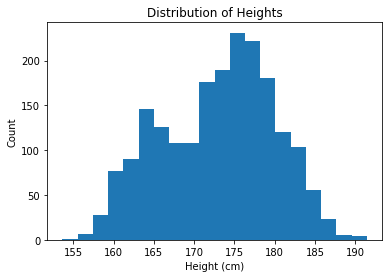

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义高斯分布的参数
mean1, std1 = 164, 3
mean2, std2 = 176, 5

# 从两个高斯分布中生成各50个样本
data1 = np.random.normal(mean1, std1, 500)
data2 = np.random.normal(mean2, std2, 1500)
data = np.concatenate((data1, data2), axis=0)

# 将数据写入 CSV 文件
df = pd.DataFrame(data, columns=['height'])
df.to_csv('height_data.csv', index=False)

# 绘制数据的直方图
plt.hist(data, bins=20)
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.title('Distribution of Heights')
plt.show()

In [8]:
data.shape


(2000,)

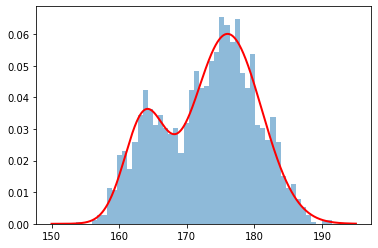

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def em_gmm(data, k, max_iter=100):
    n = len(data)
    weights = np.ones(k) / k
    means = np.random.choice(data, k)
    variances = np.ones(k)

    for i in range(max_iter):
        # E-step
        likelihoods = np.zeros((n, k))
        for j in range(k):
            likelihoods[:, j] = weights[j] * gaussian(data, means[j], np.sqrt(variances[j]))
        likelihoods_sum = np.sum(likelihoods, axis=1)
        likelihoods /= likelihoods_sum.reshape(-1, 1)
        weights = np.mean(likelihoods, axis=0)

        # M-step
        means = np.sum(likelihoods * data.reshape(-1, 1), axis=0) / np.sum(likelihoods, axis=0)
        variances = np.sum(likelihoods * (data.reshape(-1, 1) - means) ** 2, axis=0) / np.sum(likelihoods, axis=0)

    return weights, means, variances

# 运行EM算法
weights, means, variances = em_gmm(data, k=2)

# 可视化结果
x = np.linspace(150, 195, 5000)
y = weights[0] * gaussian(x, means[0], np.sqrt(variances[0])) + weights[1] * gaussian(x, means[1], np.sqrt(variances[1]))
plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, y, 'r-', linewidth=2)
plt.show()

# 预测身高所属的高斯分布
def predict(X, pi, mu, sigma):
    K = len(pi)
    gamma = np.zeros((np.size(X,0), K))
    for k in range(K):
        gamma[:, k] = pi[k] * norm.pdf(X, mu[k], sigma[k])
    return gamma.argmax(axis=1)

# 预测身高所属的高斯分布
pred = predict(data, weights, means, variances)


In [78]:
np.sqrt(variances)


array([2.95908251, 5.01551471])